# Titanic Dataset - Data Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# ReadIn the training data
titanic_train = pd.read_csv("titanic_train.csv")
print (titanic_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Variable Notes

>pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

>sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancÃ©s were ignored)

>parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Exploring the data

In [5]:
pd.pivot_table(titanic_train, index='Pclass', values=['Age', 'Fare', 'Embarked'], 
               aggfunc={'Age': np.mean, 'Fare': np.median, 'Embarked': 'count'}, margins=True)

,Age,Embarked,Fare
Pclass,,,
1,38.233441,214,60.28750
2,29.877630,184,14.25000
3,25.140620,491,8.05000
All,29.642093,712,15.64585


In [6]:
pd.pivot_table(titanic_train, index='Pclass', values=['Cabin', 'Fare'], aggfunc={'Cabin': 'count', 'Fare': np.median}, margins=True)

,Cabin,Fare
Pclass,,
1,176,60.28750
2,16,14.25000
3,12,8.05000
All,204,55.22085


In [7]:
pd.pivot_table(titanic_train, index='Cabin', values=['Pclass', 'Fare', 'SibSp', 'Parch'], 
               aggfunc={'Pclass': 'count', 'Fare': np.median, 'SibSp': 'count', 'Parch': 'count'}, margins=True)

,Fare,Parch,Pclass,SibSp
Cabin,,,,
A10,40.12500,1,1,1
A14,52.00000,1,1,1
A16,39.60000,1,1,1
A19,26.00000,1,1,1
A20,56.92920,1,1,1
...,...,...,...,...
F38,7.75000,1,1,1
F4,39.00000,2,2,2
G6,13.58125,4,4,4


In [8]:
pd.pivot_table(titanic_train, index='Pclass', columns='Embarked', values='Age', aggfunc='count', margins=True)

Embarked,C,Q,S,All
Pclass,,,,
1,74,2,108,184
2,15,2,156,173
3,41,24,290,355
All,130,28,554,712


In [9]:
pd.pivot_table(titanic_train, index='Cabin', columns= 'Pclass', values=['Ticket', 'Fare', 'SibSp', 'Parch'], 
               aggfunc={'Ticket':'count', 'Fare': np.mean, 'SibSp': 'count', 'Parch': 'count'})

Fare                      Parch           SibSp           Ticket  \
Pclass        1          2         3     1    2    3     1    2    3      1   
Cabin                                                                         
A10     40.1250        NaN       NaN   1.0  NaN  NaN   1.0  NaN  NaN    1.0   
A14     52.0000        NaN       NaN   1.0  NaN  NaN   1.0  NaN  NaN    1.0   
A16     39.6000        NaN       NaN   1.0  NaN  NaN   1.0  NaN  NaN    1.0   
A19     26.0000        NaN       NaN   1.0  NaN  NaN   1.0  NaN  NaN    1.0   
A20     56.9292        NaN       NaN   1.0  NaN  NaN   1.0  NaN  NaN    1.0   
...         ...        ...       ...   ...  ...  ...   ...  ...  ...    ...   
F33         NaN  11.333333       NaN   NaN  3.0  NaN   NaN  3.0  NaN    NaN   
F38         NaN        NaN   7.75000   NaN  NaN  1.0   NaN  NaN  1.0    NaN   
F4          NaN  39.000000       NaN   NaN  2.0  NaN   NaN  2.0  NaN    NaN   
G6          NaN        NaN  13.58125   NaN  NaN  4.0   NaN  NaN  4.0    NaN   
T       35.5000        NaN       NaN   1.0  NaN  NaN   1.0  NaN  NaN    1.0   

                  
Pclass    2    3  
Cabin             
A10     NaN  NaN  
A14     NaN  NaN  
A16     NaN  NaN  
A19     NaN  NaN  
A20     NaN  NaN  
...     ...  ...  
F33     3.0  NaN  
F38     NaN  1.0  
F4      2.0  NaN  
G6      NaN  4.0  
T       NaN  NaN  

[147 rows x 12 columns]

In [10]:
pd.pivot_table(titanic_train, index=['Ticket', 'Cabin'], columns= 'Pclass', values=['Fare', 'SibSp', 'Parch'], 
               aggfunc={'Fare': np.mean, 'SibSp': 'count', 'Parch': 'count'})

Fare                Parch           SibSp          
Pclass                        1        2     3     1    2    3     1    2    3
Ticket            Cabin                                                       
110152            B77    86.500      NaN   NaN   2.0  NaN  NaN   2.0  NaN  NaN
                  B79    86.500      NaN   NaN   1.0  NaN  NaN   1.0  NaN  NaN
110413            E67    79.650      NaN   NaN   2.0  NaN  NaN   2.0  NaN  NaN
                  E68    79.650      NaN   NaN   1.0  NaN  NaN   1.0  NaN  NaN
110465            A14    52.000      NaN   NaN   1.0  NaN  NaN   1.0  NaN  NaN
...                         ...      ...   ...   ...  ...  ...   ...  ...  ...
SC/AH Basle 541   D         NaN  13.7917   NaN   NaN  1.0  NaN   NaN  1.0  NaN
SC/Paris 2163     D         NaN  12.8750   NaN   NaN  1.0  NaN   NaN  1.0  NaN
SOTON/O.Q. 392078 E10       NaN      NaN  8.05   NaN  NaN  1.0   NaN  NaN  1.0
W.E.P. 5734       E31    61.175      NaN   NaN   1.0  NaN  NaN   1.0  NaN  NaN
WE/P 5735         B22    71.000      NaN   NaN   2.0  NaN  NaN   2.0  NaN  NaN

[161 rows x 9 columns]

In [11]:
table1 = pd.pivot_table(titanic_train, index=['Ticket', 'Cabin'], columns= 'Pclass', aggfunc={'Pclass': 'count'})
table1.head()

Pclass        
Pclass            1   2   3
Ticket Cabin               
110152 B77      2.0 NaN NaN
       B79      1.0 NaN NaN
110413 E67      2.0 NaN NaN
       E68      1.0 NaN NaN
110465 A14      1.0 NaN NaN

In [12]:
pd.pivot_table(titanic_train[titanic_train['Ticket']=='695'], index=['Ticket', 'Cabin'], columns= 'Pclass', aggfunc={'Pclass': 'count'})

,,Pclass
,Pclass,1
Ticket,Cabin,
695,B51 B53 B55,1


In [13]:
# pd.crosstab(titanic_train.Age[titanic_train.Age<15], [titanic_train.Parch, titanic_train.SibSp])
pd.crosstab(titanic_train.Age, titanic_train.Cabin).T

Age,0.92,1.00,2.00,3.00,4.00,6.00,11.00,14.00,15.00,16.00,...,58.00,60.00,61.00,62.00,63.00,64.00,65.00,70.00,71.00,80.00
Cabin,,,,,,,,,,,,,,,,,,,,,
A10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


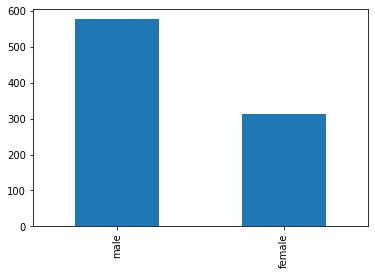

In [14]:
titanic_train['Sex'].value_counts().plot.bar()

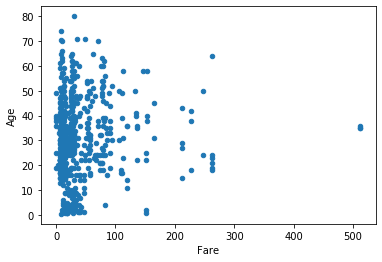

In [15]:
titanic_train.plot.scatter(x='Fare', y='Age')

In [16]:
pd.crosstab(titanic_train.Cabin, titanic_train.Pclass, values=titanic_train.Fare, aggfunc='mean')
# .plot.bar(stacked=True)

Pclass,1,2,3
Cabin,,,
A10,40.1250,NaN,NaN
A14,52.0000,NaN,NaN
A16,39.6000,NaN,NaN
A19,26.0000,NaN,NaN
A20,56.9292,NaN,NaN
...,...,...,...
F33,NaN,11.333333,NaN
F38,NaN,NaN,7.75000
F4,NaN,39.000000,NaN


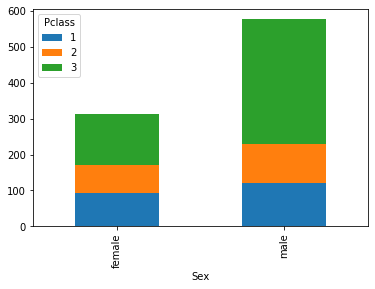

In [17]:
pd.crosstab(titanic_train.Sex, titanic_train.Pclass).plot.bar(stacked=True)

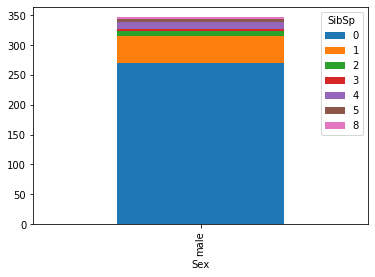

In [18]:
pd.crosstab(titanic_train[(titanic_train['Sex']=='male') & (titanic_train['Pclass']==3)]['Sex'], titanic_train.SibSp).plot.bar(stacked=True)

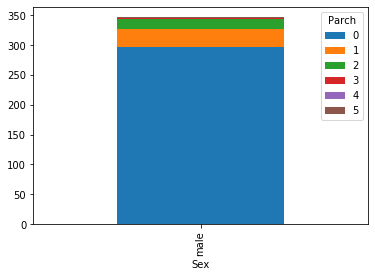

In [19]:
pd.crosstab(titanic_train[(titanic_train['Sex']=='male') & (titanic_train['Pclass']==3)]['Sex'], titanic_train.Parch).plot.bar(stacked=True)

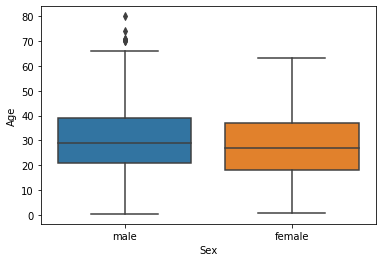

In [20]:
sns.boxplot(
    x='Sex',
    y='Age',
    data=titanic_train
)

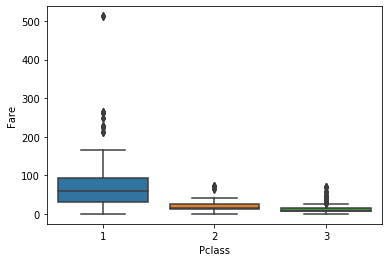

In [21]:
sns.boxplot(
    x='Pclass',
    y='Fare',
    data=titanic_train
)

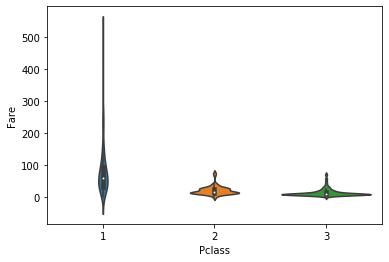

In [22]:
sns.violinplot(
    x='Pclass',
    y='Fare',
    data=titanic_train
)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


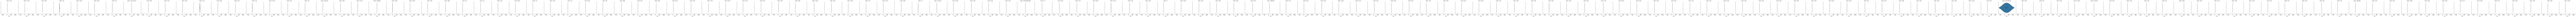

In [23]:
g = sns.FacetGrid(titanic_train, col="Cabin")
g.map(sns.violinplot, "Fare")

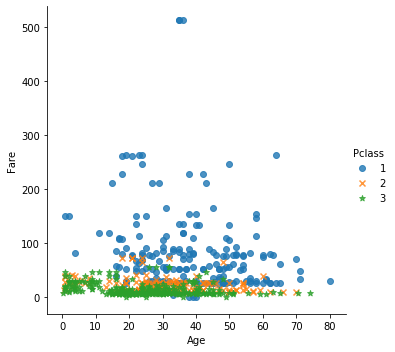

In [24]:
sns.lmplot(x='Age', y='Fare', markers=['o', 'x', '*'], hue='Pclass',
          data=titanic_train,
          fit_reg=False)

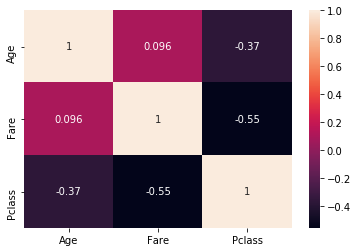

In [25]:
df = (
    titanic_train.loc[:, ['Age', 'Fare', 'Pclass']]
    .dropna()
).corr()
sns.heatmap(df, annot=True)

In [26]:
import sklearn
print(sklearn.__version__)

0.22.1
